In [1]:
%reset -f

import pandas as pd
import os
import re
import numpy as np
from six.moves import xrange
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [29]:
def p_star(theta, alpha=1.5, b=0.5, c=0):
    # MGRM cumulative probability
    return math.e**(alpha*(theta-b+c))/(1+math.e**(alpha*(theta-b+c)))


def expected_value(theta, alpha, b, cl=[1,0,-0.6], start=1):
    sum = start*1
    for c in cl:
        sum += p_star(theta, alpha, b, c)
        
    return sum

In [42]:
theta = [round(-4+0.08*x, 2) for x in xrange(100)]
df = pd.DataFrame(theta, columns=['theta'])

alpha1 = 1.5
alpha2 = 1
alpha3 = 0.5
b1 = 0.5
b2 = 0
b3 = -0.5
# 4 categories, the first needn't arguments
cl = [1, 0, -0.6]
df['c1'] = df['theta'].apply(p_star, args=(alpha1, b1, cl[0]))
df['c2'] = df['theta'].apply(p_star, args=(alpha1, b1, cl[1]))
df['c3'] = df['theta'].apply(p_star, args=(alpha1, b1, cl[2]))
df['ev1_a1_b1'] = df['theta'].apply(expected_value, args=(alpha1, b1, cl))
df['ev2_a2_b1'] = df['theta'].apply(expected_value, args=(alpha2, b1, cl))
df['ev3_a3_b1'] = df['theta'].apply(expected_value, args=(alpha3, b1, cl))

df['ev1_a1_b1'] = df['theta'].apply(expected_value, args=(alpha1, b1, cl))
df['ev2_a1_b2'] = df['theta'].apply(expected_value, args=(alpha1, b2, cl))
df['ev3_a1_b3'] = df['theta'].apply(expected_value, args=(alpha1, b3, cl))

df.head()


,theta,c1,c2,c3,ev1_a1_b1,ev2_a2_b1,ev3_a3_b1,ev2_a1_b2,ev3_a1_b3
0,-4.00,0.005220,0.001170,0.000476,1.006865,1.046359,1.315823,1.014466,1.030326
1,-3.92,0.005882,0.001318,0.000536,1.007737,1.050129,1.327180,1.016292,1.034113
2,-3.84,0.006627,0.001486,0.000605,1.008718,1.054197,1.338889,1.018346,1.038361
3,-3.76,0.007465,0.001675,0.000682,1.009823,1.058586,1.350959,1.020656,1.043123
4,-3.68,0.008409,0.001889,0.000769,1.011066,1.063319,1.363395,1.023252,1.048460


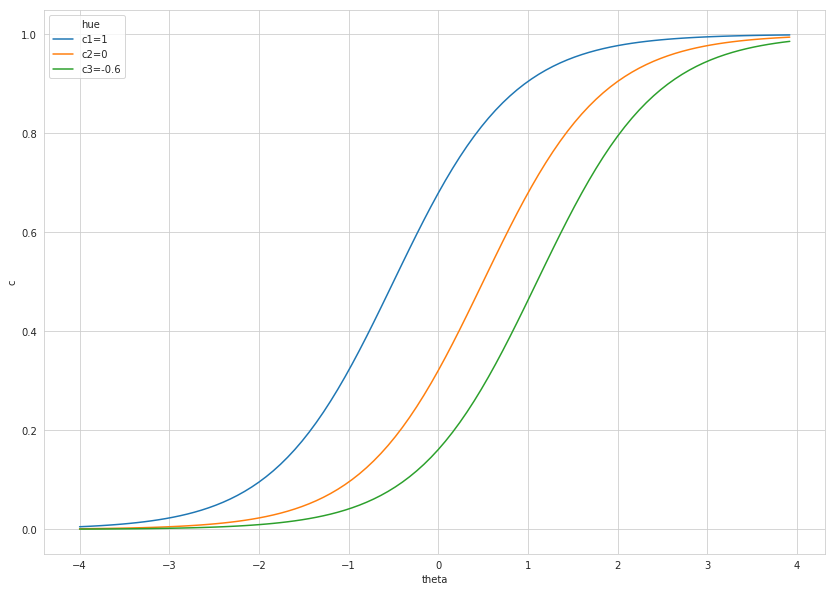

In [52]:
names = ['theta', 'c1='+str(cl[0]), 'c2='+str(cl[1]), 'c3='+str(cl[2])]
tmp = df[['theta', 'c1', 'c2', 'c3']]
tmp.columns = names

tmp = pd.melt(tmp, id_vars=['theta'], 
              value_vars=names[1:], var_name='hue', value_name='c')

sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
# ax = sns.lineplot(x='theta', y="ev", data=df)
ax = sns.lineplot(x='theta', y="c", hue='hue', data=tmp)

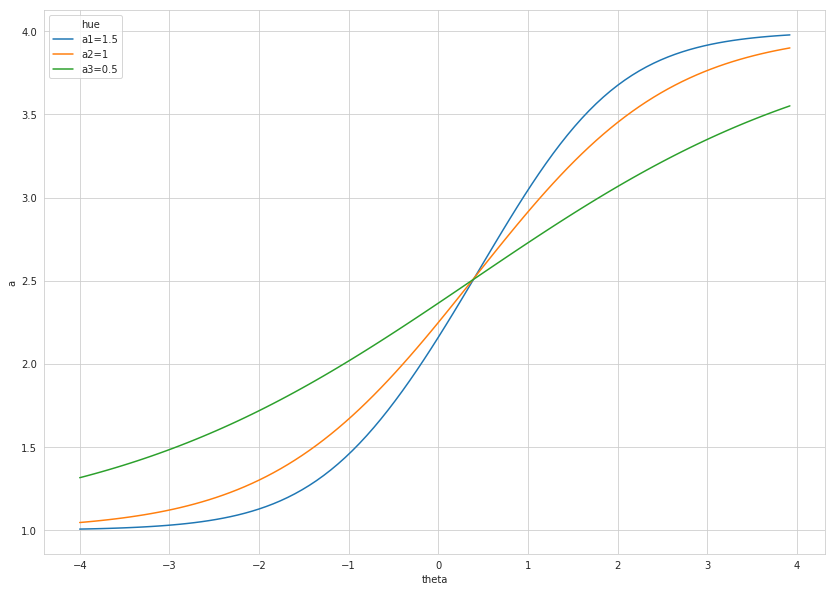

In [56]:
names = ['theta', 'a1='+str(alpha1), 'a2='+str(alpha2), 'a3='+str(alpha3)]
tmp = df[['theta', 'ev1_a1_b1', 'ev2_a2_b1', 'ev3_a3_b1']]
tmp.columns = names

tmp = pd.melt(tmp, id_vars=['theta'], 
              value_vars=names[1:], var_name='hue', value_name='a')

sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
# ax = sns.lineplot(x='theta', y="ev", data=df)
ax = sns.lineplot(x='theta', y="a", hue='hue', data=tmp)

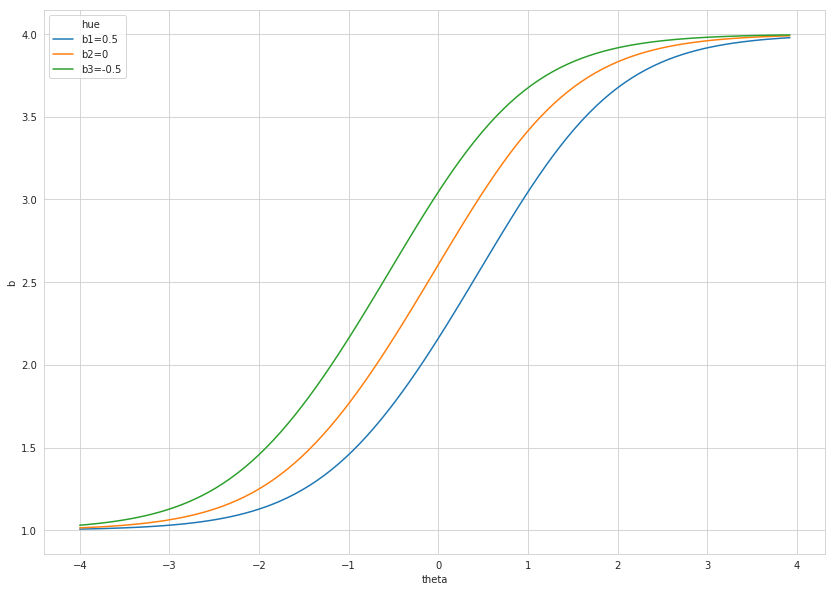

In [57]:
names = ['theta', 'b1='+str(b1), 'b2='+str(b2), 'b3='+str(b3)]
tmp = df[['theta', 'ev1_a1_b1', 'ev2_a1_b2', 'ev3_a1_b3']]
tmp.columns = names

tmp = pd.melt(tmp, id_vars=['theta'], 
              value_vars=names[1:], var_name='hue', value_name='b')

sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
# ax = sns.lineplot(x='theta', y="ev", data=df)
ax = sns.lineplot(x='theta', y="b", hue='hue', data=tmp)

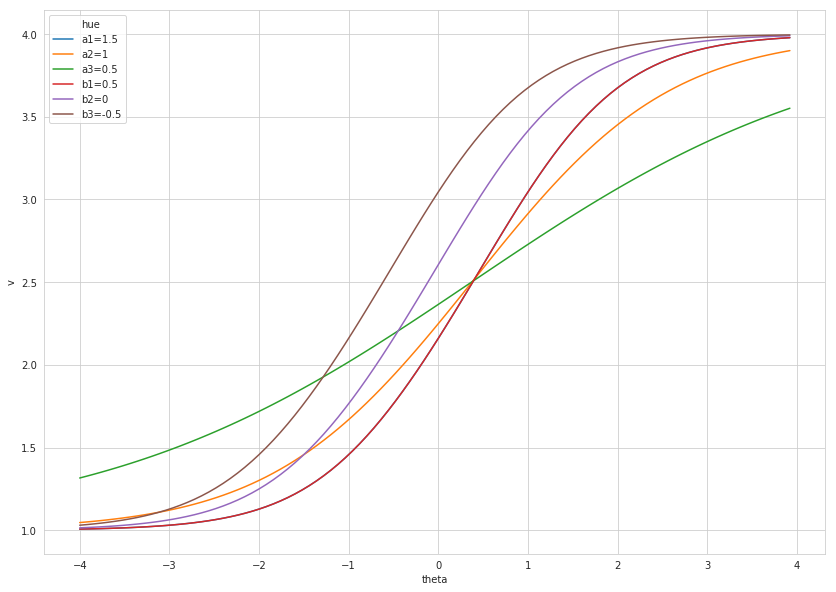

In [60]:
names = ['theta', 'a1='+str(alpha1), 'a2='+str(alpha2), 'a3='+str(alpha3)]
tmp1 = df[['theta', 'ev1_a1_b1', 'ev2_a2_b1', 'ev3_a3_b1']]
tmp1.columns = names

tmp1 = pd.melt(tmp1, id_vars=['theta'], 
              value_vars=names[1:], var_name='hue', value_name='v')

names = ['theta', 'b1='+str(b1), 'b2='+str(b2), 'b3='+str(b3)]
tmp2 = df[['theta', 'ev1_a1_b1', 'ev2_a1_b2', 'ev3_a1_b3']]
tmp2.columns = names

tmp2 = pd.melt(tmp2, id_vars=['theta'], 
              value_vars=names[1:], var_name='hue', value_name='v')

tmp = pd.concat([tmp1, tmp2])

sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
# ax = sns.lineplot(x='theta', y="ev", data=df)
ax = sns.lineplot(x='theta', y="v", hue='hue', data=tmp)

In [ ]:
Y = np.random.randn(10)


In [62]:
theta_estimates = np.random.randn(10)
theta_estimates

array([-1.58656346,  1.05248165,  0.02280427, -1.22596472, -0.6180213 ,
        1.16076628, -0.44913226,  0.27650619, -0.37413219,  1.4908982 ])